In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import re
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
#data = pd.read_csv('nyc_real_estate.csv', index_col=False)

data = pd.read_csv('../project/nyc_real_estate.csv', index_col=False)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [4]:
data.rename(columns = {"Area" : "Area (sqft)"}, inplace = True)
data = data.drop(labels = ['Unnamed: 0'], axis = 1)
data = data.replace("Null", pd.NA).dropna()
data['Price'] = data['Price'].str.replace('$', '')
data['Baths_cleaned'] = data['Baths'].str.replace('Baths', '')
data['Baths_cleaned'] = data['Baths_cleaned'].str.replace('Bath', '')
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])
data['Area (sqft)']= data['Area (sqft)'].apply(lambda x: x.strip('sqft'))
data['Area (sqft)']= data['Area (sqft)'].str.replace(',', '')
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Beds'] = data['Beds'].apply(lambda x: int(x))
data['Year Built'] = data['Year Built'].apply(lambda x : int(x[-4:]))
data['Beds'] = data['Beds'].replace('S', 0.5)
#data['Price'] = data['Price'].apply(lambda x: int(re.search(r'\d+', x).group()))
data['Beds'] = data['Beds'].apply(lambda x : int(x))
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace(',', '').astype(int)
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : x.strip('sqft'))
data['Area (sqft)'] = data['Area (sqft)'].str.replace(',', '')
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : int(re.search(r'\d+', x).group()))

/var/folders/0k/9ww6ld9955q88m1k2jkfvkvh0000gn/T/ipykernel_21316/3189022513.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')
/var/folders/0k/9ww6ld9955q88m1k2jkfvkvh0000gn/T/ipykernel_21316/3189022513.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')


In [5]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area (sqft),Price(per sqft),A/C,Baths_cleaned
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620000,2022,0,1 Bath,441,1406,Cooling only,1
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730000,2022,1,1 Bath,579,1261,Cooling only,1
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570000,2022,0,1 Bath,429,1329,Cooling only,1
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695000,2022,1,1 Bath,632,1100,No,1
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235995,1970,1,1 Bath,850,278,No,1
...,...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635000,1975,0,1 Bath,528,1203,Cooling only,1
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4500000,1845,5,6 Baths,3192,1410,No,6
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1395000,2008,2,2 Baths,1185,1177,No,2
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279900,1974,2,1 Bath,1100,254,Heating & Cooling,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 385
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             251 non-null    object
 1   City             251 non-null    object
 2   Neighbourhood    251 non-null    object
 3   Price            251 non-null    int64 
 4   Year Built       251 non-null    int64 
 5   Beds             251 non-null    int64 
 6   Baths            251 non-null    object
 7   Area (sqft)      251 non-null    int64 
 8   Price(per sqft)  251 non-null    int64 
 9   A/C              251 non-null    object
 10  Baths_cleaned    251 non-null    object
dtypes: int64(5), object(6)
memory usage: 23.5+ KB


## Is there a correlation between the number of bedrooms and property price?

In [7]:
olsreg = ols('Price ~ Beds', data=data).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     99.46
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           6.30e-20
Time:                        19:56:27   Log-Likelihood:                -3740.0
No. Observations:                 251   AIC:                             7484.
Df Residuals:                     249   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.29e+05   7.02e+04      6.113      0.000    2.91e+05    5.67e+05
Beds        2.828e+05   2.84e+04      9.973      0.000    2.27e+05    3.39e+05
==============================================================================
Omnibus:                      106.656   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.887
Skew:                           1.775   Prob(JB):                     5.98e-90
Kurtosis:                       8.166   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
r_squared = olsreg.rsquared
p_value = olsreg.f_pvalue

r_squared, p_value

(0.2854370344509515, 6.301769648197888e-20)

The R-squared value from the OLS regression is a statistical measure representing the proportion of the variance for property price (dependent variable) explained by the number of bedrooms (independent variable). With a value of 0.2854, we see that approximately 28.54% of the variability in property prices can be explained by the number of bedrooms.

Additionally, the p-value is a statistical test to determine whether there is a relationship between two variables. In this case, we are looking at if there is a relationship between the number of bedrooms and property price. Due to the number of 6.301769648197888e-20, we see there is a statistically significant relationship because of how small the p-value is. This means we have strong enough evidence to reject the null hypothesis that there is no relationship between these two variables.


In summary, the analysis using linear regression suggests that the number of bedrooms has a statistically significant correlation with property price, and the model explains approximately 28.54% of the variability in property prices based on the number of bedrooms.

Text(463.154761904762, 0.5, 'Price ($)')

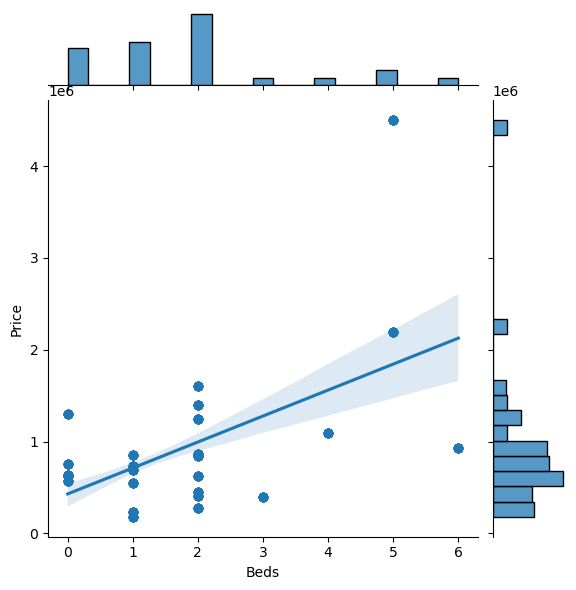

In [9]:
jg = sns.JointGrid(x="Beds", y="Price", data=data)
jg.plot(sns.regplot, sns.histplot)
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")

The Joint Grid above shows a positive correlation between Beds and the Price of the property in the regression plot. As the number of beds increases, the price increases too. The distribution plot shows the distribution of observations for each value of X and Y, showing a heavier distribution toward lower prices and a few number of beds, meaning that these properties are more readily available in the New York Market.  


## Is there a relationship between ‘Year Built’ and ‘Price’? What two variables influence price the most?  

In [10]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')
        

In [11]:
output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()
output = output.unstack().sort_values(key=abs, ascending=False).drop_duplicates().reset_index()
output.columns = ['var1', 'var2', 'correlation']
mask = output.apply(lambda x: x.var1 != x.var2, axis=1)
output = output[mask]
output[:5]

/var/folders/0k/9ww6ld9955q88m1k2jkfvkvh0000gn/T/ipykernel_21316/2505699685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()


,var1,var2,correlation
1,Price,Area (sqft),0.829771
2,Year Built,Price(per sqft),0.744994
3,Year Built,Area (sqft),-0.614899
4,Price(per sqft),Area (sqft),-0.579244
5,Price,Year Built,-0.561095


In [12]:
data_pca = data[['Price', 'Year Built', 'Beds', 'Baths_cleaned', 'Area (sqft)', 'Price(per sqft)']]
houses_X = data_pca.values
houses_Y = data_pca.index
from sklearn.preprocessing import scale
scale(houses_X)

array([[-0.40496747,  1.22476924, -1.17998832, -0.78875229, -0.24760062,
         1.33442156],
       [-0.27509971,  1.22476924, -0.55514218, -0.78875229, -0.24053395,
         1.00685759],
       [-0.46399827,  1.22476924, -1.17998832, -0.78875229, -0.24821511,
         1.16047379],
       ...,
       [ 0.51000991,  0.92929766,  0.06970395, -0.03884008, -0.20950206,
         0.81709639],
       [-0.80649497,  0.21172381,  0.06970395, -0.78875229, -0.21385472,
        -1.26801774],
       [ 0.14874142,  0.02177779,  1.31939622,  0.71107214, -0.17293974,
        -0.547377  ]])

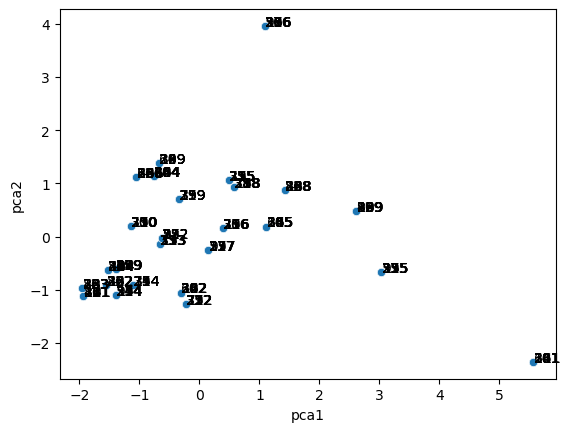

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(houses_X))
X_pca_labelled = pd.concat([pd.DataFrame({'who':houses_Y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [14]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['Price', 'Year Built', 'Beds', 'Baths_cleaned', 'Area (sqft)']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df)

IndexError: list index out of range

In [15]:
pca.explained_variance_

array([2.94888652, 1.50753934])

In [16]:
np.cov(X_pca)

array([[ 0.34133892,  0.26140978,  0.40705554, ..., -0.3056848 ,
         0.78705912, -0.3808844 ],
       [ 0.26140978,  0.20019713,  0.31173796, ..., -0.23410456,
         0.60275855, -0.29169515],
       [ 0.40705554,  0.31173796,  0.48542432, ..., -0.36453708,
         0.93858848, -0.45421456],
       ...,
       [-0.3056848 , -0.23410456, -0.36453708, ...,  0.27375489,
        -0.70484788,  0.34109962],
       [ 0.78705912,  0.60275855,  0.93858848, ..., -0.70484788,
         1.81480058, -0.87824309],
       [-0.3808844 , -0.29169515, -0.45421456, ...,  0.34109962,
        -0.87824309,  0.42501139]])

In [17]:
pca.explained_variance_ratio_

array([0.48952299, 0.25025554])

/var/folders/0k/9ww6ld9955q88m1k2jkfvkvh0000gn/T/ipykernel_21316/1301959331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

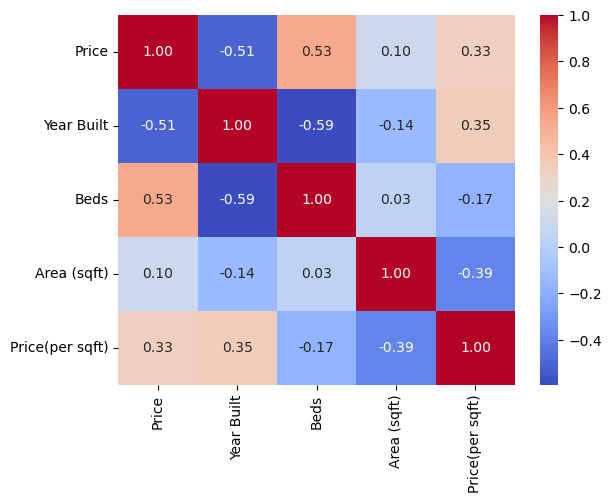

In [18]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [19]:
formula = 'Q("Year Built") ~ Baths_cleaned'
model = smf.ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Year Built")   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     57.81
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.45e-39
Time:                        19:57:00   Log-Likelihood:                -1226.8
No. Observations:                 251   AIC:                             2466.
Df Residuals:                     245   BIC:                             2487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1990.1589      3.140    633.768      0.000    1983.974    1996.344
Baths_cleaned[T.2 ]   -26.1270      4.592     -5.690      0.000     -35.172     -17.082
Baths_cleaned[T.3 ]   -25.1589     10.741     -2.342      0.020     -46.316      -4.002
Baths_cleaned[T.4 ]   -85.6589      7.913    -10.825      0.000    -101.245     -70.073
Baths_cleaned[T.5 ]   -70.1589     10.741     -6.532      0.000     -91.316     -49.002
Baths_cleaned[T.6 ]  -145.1589     10.741    -13.514      0.000    -166.316    -124.002
==============================================================================
Omnibus:                       12.783   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.946
Skew:                          -0.118   Prob(JB):                       0.0512
Kurtosis:                       2.284   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Does the presence of amenities (like air conditioning) have a statistically significant impact on property prices in New York?

### Note: converting air condition below to numeric values with 0 representing 'No', 1 representing 'Cooling', and 2 representing 'heating and cooling'

In [20]:
data = data.rename(columns={'A/C': 'Air_Condition'})

In [21]:
def convert_condition(value):
    if value == 'No':
        return 0
    elif value == 'Cooling only':
        return 1
    else:
        return 2

In [22]:
data['Air_Condition'] = data['Air_Condition'].apply(convert_condition)

In [23]:
data['Baths_cleaned'] = data['Baths_cleaned'].apply(lambda x: int (x))

### Anova Test

In [24]:
ny_lm = ols('Price ~ Air_Condition + Baths_cleaned + Beds', data=data).fit()
table = sm.stats.anova_lm(ny_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
Air_Condition,2.200510e+13,1.0,110.486637,1.339053e-21
Baths_cleaned,6.220911e+13,1.0,312.349165,9.761773e-46
Beds,1.067585e+12,1.0,5.360294,2.142047e-02
Residual,4.919382e+13,247.0,NaN,NaN


The statistical significance of the variables Air Conditioning, Number of Baths, and Number of Beds in explaining the variability in property prices (Price) is being shown here. These are the numerical values obtained from the most recent Anova test.

Air Conditioning: The sum squares is 2.200510e+13, the F-statistic is 110.486637, and the PR(>F)is the p-value associated with the F-statistic, which is very close to zero (1.339053e-21). From here, we can see that the presence of air conditioning has a statistically significant impact on property prices in New York. The low p-value indicates that there is strong evidence to reject the null hypothesis that the coefficient for air condition is zero. 


Number of baths: The sum squares is 6.220911e+13, the F-statistic is 312.349165, and the PR(>F) (p-value) is 9.761773e-46. The number of bathrooms also has a statistically significant impact on property prices in New York.

Beds: The sum of squares is 1.067585e+12, the F-statistic is 5.360294, and the PR(>F) (p-value) is 0.02142047. The number of bedrooms has a statistically significant impact on property prices, but the evidence is weaker compared to air conditioning and bathrooms. The p-value is slightly above the common significance level of 0.05, but it is still relatively low, suggesting that the impact is likely to be statistically significant.

In summary, the presence of air conditioning, the number of bathrooms, and the number of bedrooms all have statistically significant impacts on property prices in New York, but the strongest impact is the number of bathrooms.

In [25]:
med_am = data.groupby('Neighbourhood')[['Air_Condition', 'Baths_cleaned', 'Beds']].median()
med_am

,Air_Condition,Baths_cleaned,Beds
Neighbourhood,,,
Astoria,1.0,1.0,0.5
Battery Park,0.0,1.0,1.0
Baychester,2.0,2.0,2.0
Bedford Stuyvesant,1.0,3.0,3.5
Brooklyn Heights,0.0,6.0,5.0
Canarsie,2.0,4.0,6.0
Flushing,0.0,2.0,2.0
Gravesend,1.0,2.0,2.0
Heartland Village,2.0,2.0,2.0


Now, we incorporate neighbourhoods to see if the different amenities offered differ from different neighborhoods. Because of the anova test above, we know that amenities have statistical significance, meaning they directly affect property prices. In this case, we can assume that the more amenities seen in a neighborhood, the higher the property prices are in that neighborhood. In this case, we can see that New Brighton has the highest amount of baths, making its property more expensive. Additionally, all the neighborhoods with the median of 2 for air conditioning are more expensive than the ones with 0. For example, Mill Basin is more expensive than Midtown. See below for a direct comparison of their prices to show this example:


In [26]:
data[data['Neighbourhood'] == 'Mill Basin']['Price']

25     1089000
65     1089000
105    1089000
145    1089000
185    1089000
225    1089000
265    1089000
305    1089000
345    1089000
385    1089000
Name: Price, dtype: int64

In [27]:
data[data['Neighbourhood'] == 'Midtown']['Price']

14     752400
54     752400
94     752400
134    752400
174    752400
214    752400
254    752400
294    752400
334    752400
374    752400
Name: Price, dtype: int64

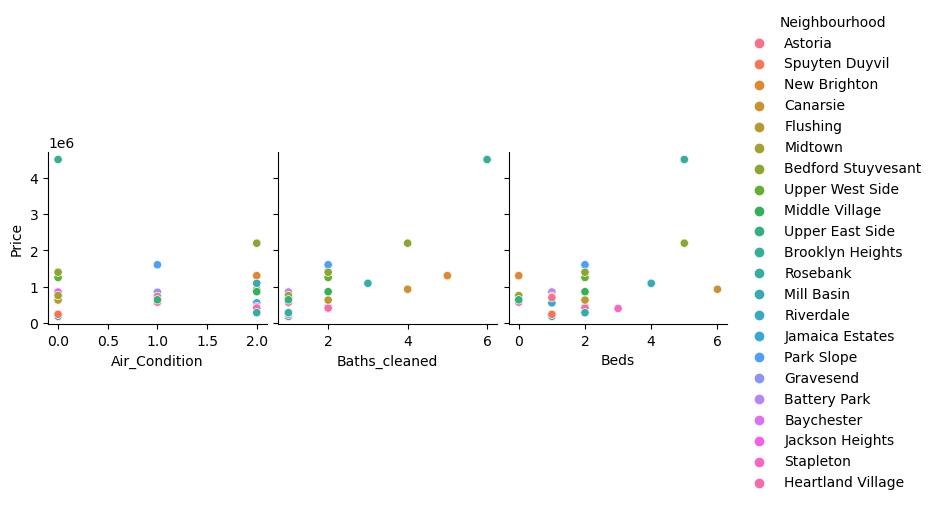

In [28]:
sns.pairplot(
    data, hue='Neighbourhood',
    x_vars=["Air_Condition", "Baths_cleaned", "Beds"],
    y_vars=["Price"])

The pairplots above shows a visual representation of our regression analysis. As you can see, we were able to determine that Air Conditioning, the Number of Baths, and the Number of Beds all had a statistically significant (at a 95% confidence level) effect (p<0.05) on property prices in New York. The biggest impact is with the number of bathrooms.

## add alina's stuff below

## SVM classification

In [29]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area (sqft),Price(per sqft),Air_Condition,Baths_cleaned
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620000,2022,0,1 Bath,441,1406,1,1
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730000,2022,1,1 Bath,579,1261,1,1
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570000,2022,0,1 Bath,429,1329,1,1
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695000,2022,1,1 Bath,632,1100,0,1
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235995,1970,1,1 Bath,850,278,0,1
...,...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635000,1975,0,1 Bath,528,1203,1,1
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4500000,1845,5,6 Baths,3192,1410,0,6
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1395000,2008,2,2 Baths,1185,1177,0,2
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279900,1974,2,1 Bath,1100,254,2,1


In [30]:
target = "Baths"

X = data.drop(columns=[target,'Name','City','Neighbourhood','Price(per sqft)','Air_Condition'])
y = data[target]

#X is just the measurements and y are just the labels

seed = 100
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [31]:
X

,Price,Year Built,Beds,Area (sqft),Baths_cleaned
1,620000,2022,0,441,1
2,730000,2022,1,579,1
3,570000,2022,0,429,1
4,695000,2022,1,632,1
6,235995,1970,1,850,1
...,...,...,...,...,...
379,635000,1975,0,528,1
381,4500000,1845,5,3192,6
382,1395000,2008,2,1185,2
384,279900,1974,2,1100,1


In [32]:

model = svm.SVC(gamma="scale",kernel="rbf")
#instantiation of the moderl and pass in hyper-parameters
model.fit(X_train, y_train)

SVC()

In [33]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#score model to get accuracy

Accuracy: 57.83%


I started off by using Support Vector Machines to classify how many baths there would be in a house based on the information we have about the houses' total price, year built, quantity of bedrooms, and overall area. I separated the data into 2/3 being used for training and 1/3 being used for testing. Once I predict the target variable (Baths) on the test set using the trained model, I calculate the accuracy of the model on the test set. With an accuracy of 57.83%, the model correctly predicted the number of baths for approximately 57.83% of the instances in the test set. In other words, the model's predictions were accurate for less than half of the test data. I created a confusion matrix in order to better visualize what the models predictions are and where it could be potentially going wrong. In this case, the model shows relatively low precision, recall, and F1-score for most classes, indicating that it struggles to correctly classify instances in those categories.

In [34]:
y_pred

array(['6 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '6 Baths', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '4 Baths', '2 Baths',
       '4 Baths', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '1 Bath',
       '2 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '2 Baths', '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths'], dtype=object)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5783132530120482
[[31  0  0  0  0  0]
 [26  9  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 3  0  0  3  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

      1 Bath       0.52      1.00      0.68        31
     2 Baths       0.60      0.26      0.36        35
     3 Baths       0.00      0.00      0.00         4
     4 Baths       1.00      0.50      0.67         6
     5 Baths       0.00      0.00      0.00         2
     6 Baths       1.00      1.00      1.00         5

    accuracy                           0.58        83
   macro avg       0.52      0.46      0.45        83
weighted avg       0.58      0.58      0.51        83



/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes Classification

In [41]:
from sklearn.metrics import accuracy_score
#import a way to measure how good our model is. what proportion of result do we get right
from sklearn.naive_bayes import GaussianNB
#import for our classifier

#most likley memebership/classififcation for any indidvdiual


model = GaussianNB()
#instantiate the model
model.fit(X_train, y_train)
#fit to the training data set (never fit to test dataset)
y_pred = model.predict(X_test)
# make predictions for test data
predictions = y_pred
#gives us a series of predictions and set to a new variable 
predictions

array(['6 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '5 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '6 Baths', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '4 Baths', '4 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '4 Baths', '3 Baths',
       '4 Baths', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '1 Bath',
       '2 Baths', '1 Bath', '3 Baths', '1 Bath', '1 Bath', '3 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath', '1 Bath',
       '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '2 Baths', '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '3 Baths', '1 Bath', '1 Bath', '5 Baths'], dtype='<U7')

In [42]:
matches = pd.concat([pd.DataFrame(y_test.values).reset_index(),pd.DataFrame(predictions).reset_index()], axis=1)
#concatinate the test values put them next to our actual values. Row 17 is the first falsley predicted label
#Actual is veriscilor predicted is virginica (modle doenst get everything correct)

matches

,index,0,index,0
0,0,6 Baths,0,6 Baths
1,1,2 Baths,1,1 Bath
2,2,2 Baths,2,2 Baths
3,3,1 Bath,3,1 Bath
4,4,1 Bath,4,1 Bath
...,...,...,...,...
78,78,1 Bath,78,1 Bath
79,79,3 Baths,79,3 Baths
80,80,2 Baths,80,1 Bath
81,81,2 Baths,81,1 Bath


In [43]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#actual number of posistives + true negatives / allsamples
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#confusion_matrix tells us where the model went wrong
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 68.67%
[[31  0  0  0  0  0]
 [26  9  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

      1 Bath       0.54      1.00      0.70        31
     2 Baths       1.00      0.26      0.41        35
     3 Baths       1.00      1.00      1.00         4
     4 Baths       1.00      1.00      1.00         6
     5 Baths       1.00      1.00      1.00         2
     6 Baths       1.00      1.00      1.00         5

    accuracy                           0.69        83
   macro avg       0.92      0.88      0.85        83
weighted avg       0.83      0.69      0.64        83



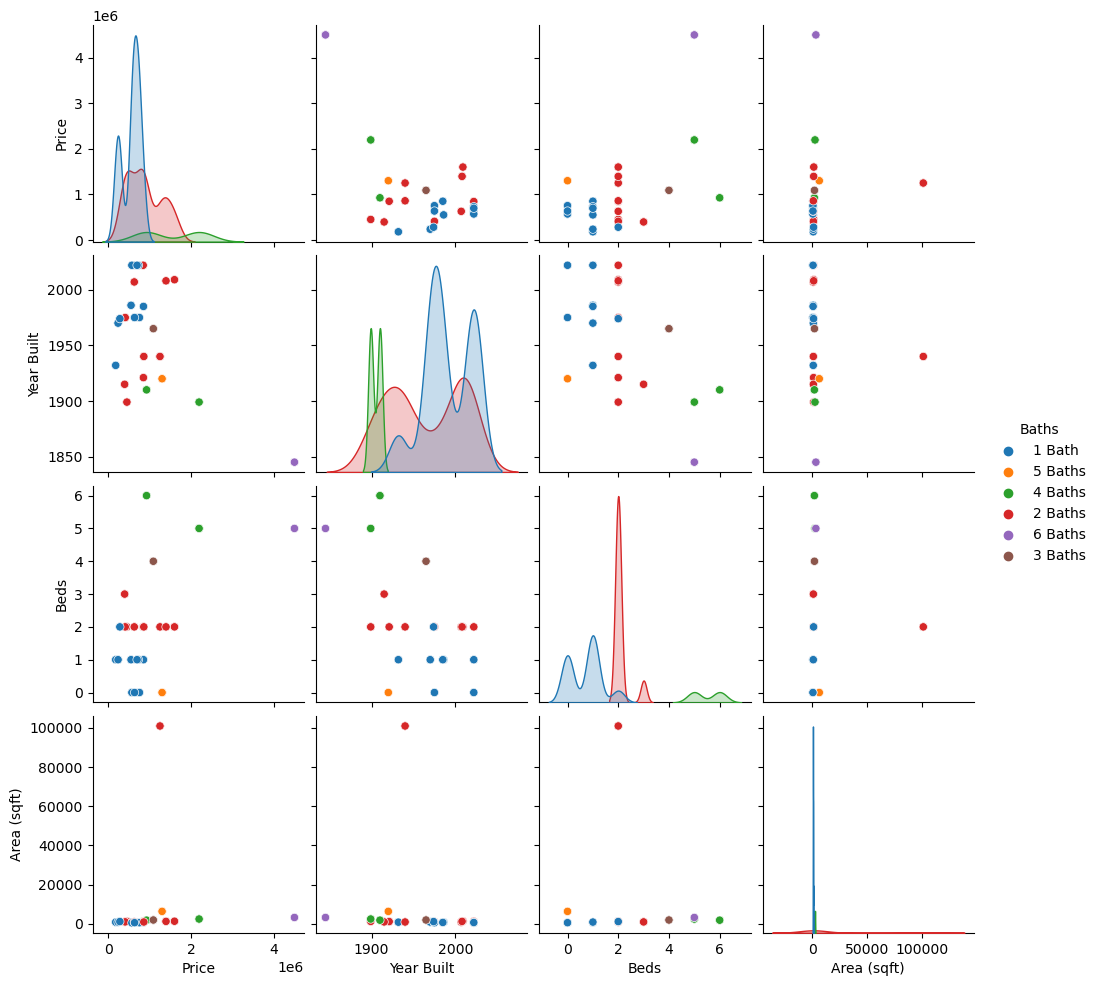

In [45]:
columns_to_drop = ['Air_Condition', 'Baths_cleaned', 'Price(per sqft)']
data_subset = data.drop(columns=columns_to_drop)

sns.pairplot(data_subset, hue='Baths', height=2.5)



I tried to use a new classifier, Naive Bayes, in hopes to get better predictions/results. The Naive Bayes classifier achieved an accuracy of approximately 68.67% on the test set. This means it correctly predicted the target variable for about 68.67% of the instances. Looking at the confusion matrix, it correctly predicted more instances for each class in respect to the SVM. 

For example, in the first row, it correctly predicted all 31 instances of "1 Bath." However, in the second row, it displayed some challenges, accurately identifying 9 instances of "2 Baths" but misclassifying 26 instances as "1 Bath."

We can see the results better visually in the pairplot. We see a grid of scatterplots where each variable is plotted against every other variable. The hue=Baths adds an additional layer of information by coloring the points based on the quantity of baths in a house. This can be useful for visually inspecting relationships between variables and identifying patterns or clusters depending on the quantity of baths a house has. The Naive Bayes classifier seems to be more of a suitable choice for the given classification task compared to SVM.

In [48]:
model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=3, 
    )

#decison trees are the same game as 20 questions on a dataset
#entropy is a measure of the predictablity in each class 
#max_depth 


model.fit(X_train,y_train)
#fit
y_pred = model.predict(X_test)
#predict
accuracy = model.score(X_test, y_test)
# evaluate predictions

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.16%


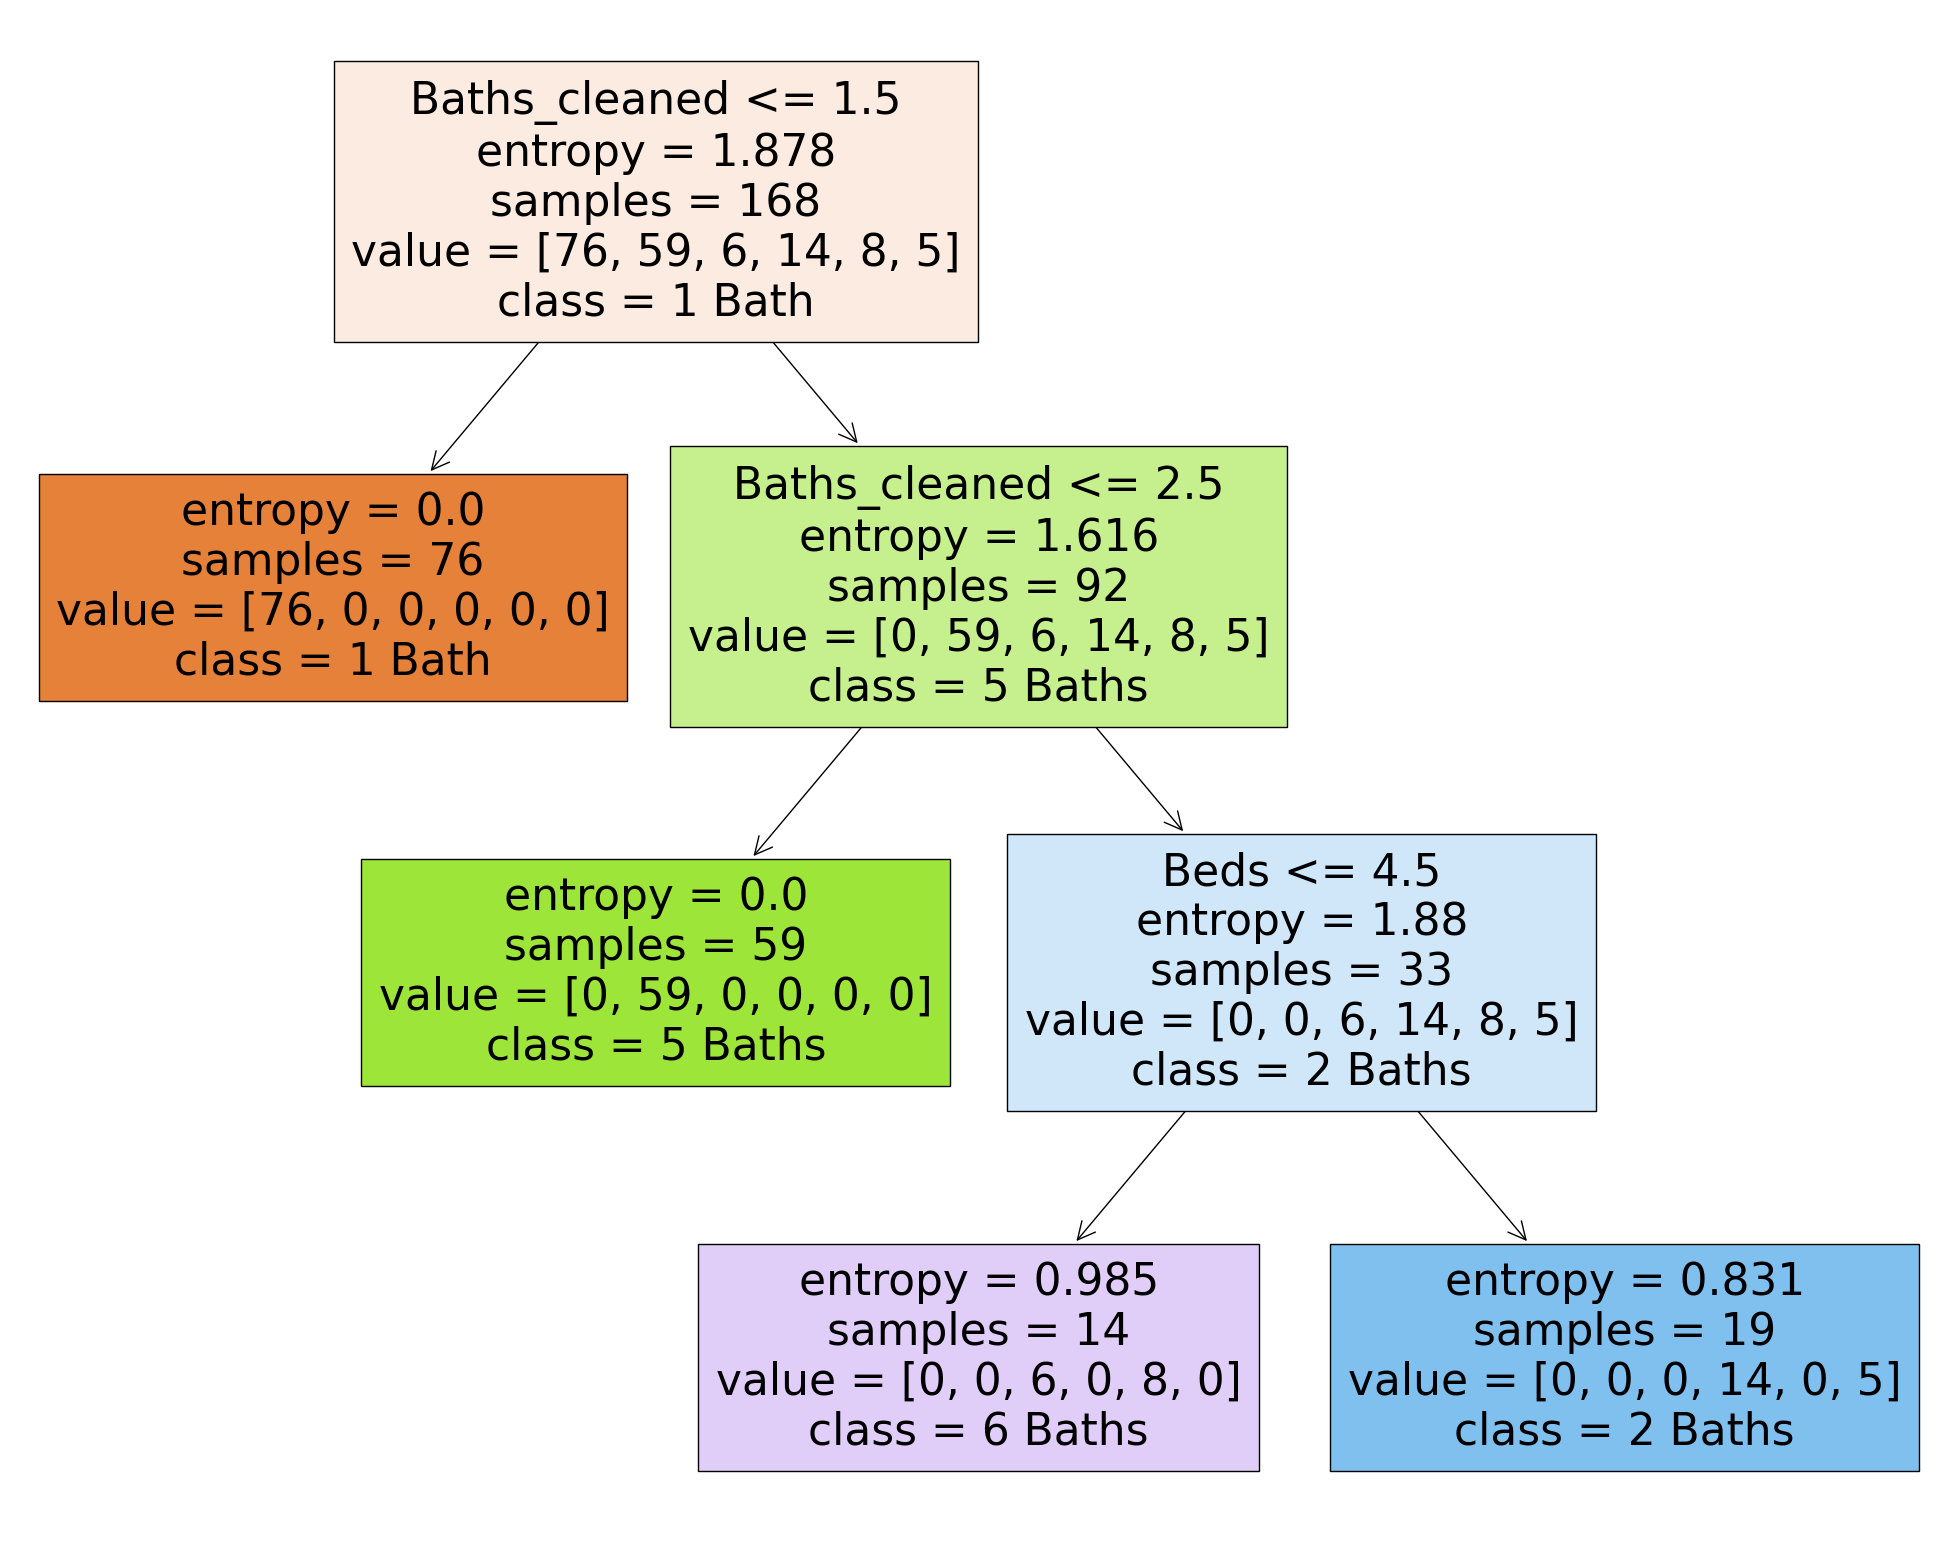

In [51]:
fig = plt.figure(figsize=(25,20))
# we use '_' to capture the return from plot_tree(...) and never do anything with it
_ = plot_tree(model, 
                feature_names=list(X.columns),  # ordered list of features
                class_names=list(y.unique()), # unique() is handy here due to numerical sorting of classes
                filled=True)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.891566265060241
[[31  0  0  0  0  0]
 [ 0 35  0  0  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  5  0  0]]
              precision    recall  f1-score   support

      1 Bath       1.00      1.00      1.00        31
     2 Baths       1.00      1.00      1.00        35
     3 Baths       0.00      0.00      0.00         4
     4 Baths       0.55      1.00      0.71         6
     5 Baths       0.33      1.00      0.50         2
     6 Baths       0.00      0.00      0.00         5

    accuracy                           0.89        83
   macro avg       0.48      0.67      0.53        83
weighted avg       0.84      0.89      0.86        83



/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The last classifier I decided to use is the decision tree classifier. Based on the accuracy the decision tree model correctly predicted the target variable for approximately 89.16% of instances in the test set. This decision tree achieved an accuracy of 89.16%, and the visualization allows for an interpretation of how the model makes decisions based on the features in the dataset. The first node in the decision tree is a decision based on the feature "beds" with a threshold of 1.5. The entropy at this node is 1.878, and there are 168 samples in this node that meet the condition beds <=1.5 . The class distribution for these samples is given by the "value" parameter, and the class labels are associated with the counts: 76, 59, 6, 14, 8, 5, corresponding to the classes 1, 2, 3, 4, 5, 6 Baths. The next step in this decision tree would be for instances with "beds" less than or equal to 1.5 they go to the left branch, and those with "beds" greater than 1.5 go to the right branch. The decision tree will continue to split the data based on other features and thresholds to further refine the predictions. Each split will create new nodes, each with its own entropy, samples, value, and class information. This process continues recursively until the tree reaches a stopping criterion, such as reaching the maximum depth specified or having nodes with pure classes.

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=5, n_jobs=-1)
#taking our original dataset and witholding some of that data and traianing/testing. doing it 5 times and getting the mean accuracy

print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))

Accuracy: 92.03% (+/- 0.13)


The average accuracy of my decision tree model across the different folds of the cross-validation is 92.03%. This represents the central tendency of the model's accuracy. The confidence interval of 92.03% (+/- 0.13) suggests that I am  reasonably confident that the true accuracy of the model falls within the range of 82.75% to 87.95%. 

The decision tree model exhibits an impressive average accuracy of 92.03% across various cross-validation folds, serving as a reliable indicator of its central tendency. With a narrow confidence interval of 92.03% (+/- 0.13), I can reasonably assert that the true accuracy lies within the range of 91.90% to 92.16%, instilling a high level of confidence in the model's performance. The narrow width of the interval indicates a high level of precision and confidence in the reported accuracy estimate.